In [1]:
%load_ext autoreload
import uproot as ut
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import re
import sympy as sp
import math
import vector


from tqdm import tqdm
import timeit

from utils import *
%autoreload 2

In [2]:
signal = fc.NMSSM_MX_700_MY_400
signal_tree = Tree(signal)
signal_selection = Selection(signal_tree)
signal_selection.sort_jets("jet_btag")

In [3]:
qcd_trees = TreeList(fc.QCD_Pt_List)

qcd_selections = SelectionList(qcd_trees)

qcd_selections.sort_selected_jets("jet_btag")

In [4]:
def plot_ijet(selections,varname,ijet,labels=None,figax=None):
    if figax is None: figax = plt.subplots(nrows=1,ncols=1,figsize=(8,5))
    fig,axs = figax
    
    jet_varinfo = varinfo[varname]

    hists = [ selection[varname][:,ijet] for selection in selections ]
    weights = [ selection.scale_weights() for selection in selections ]
    
    info = varinfo[varname]

    hist_multi(hists,labels=labels,weights=weights,density=1,**info,figax=(fig,axs))

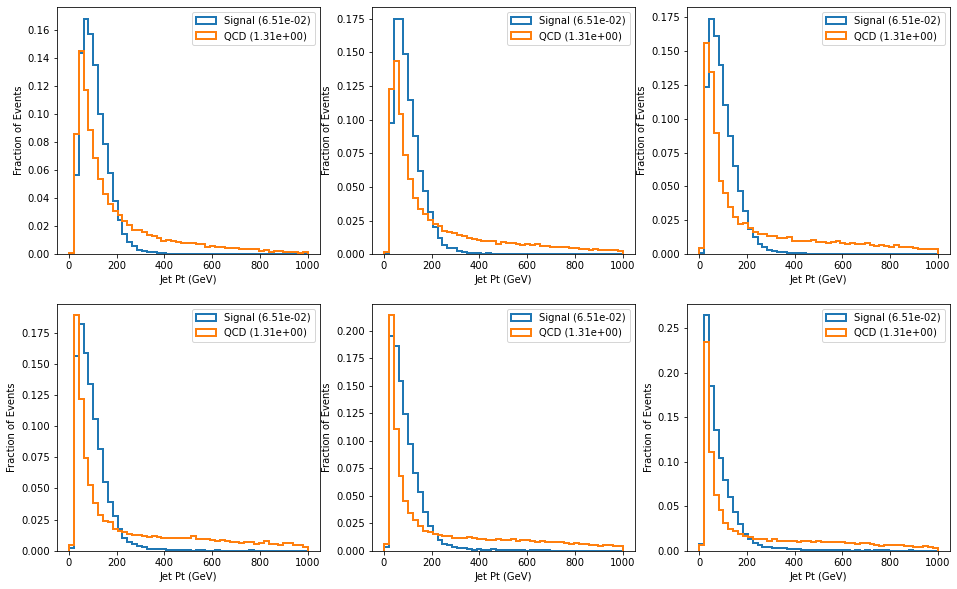

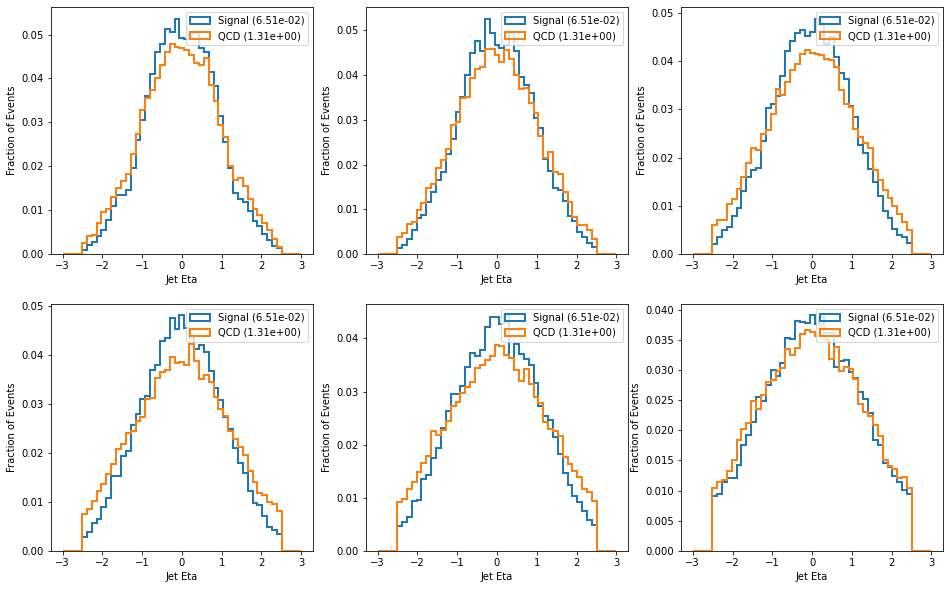

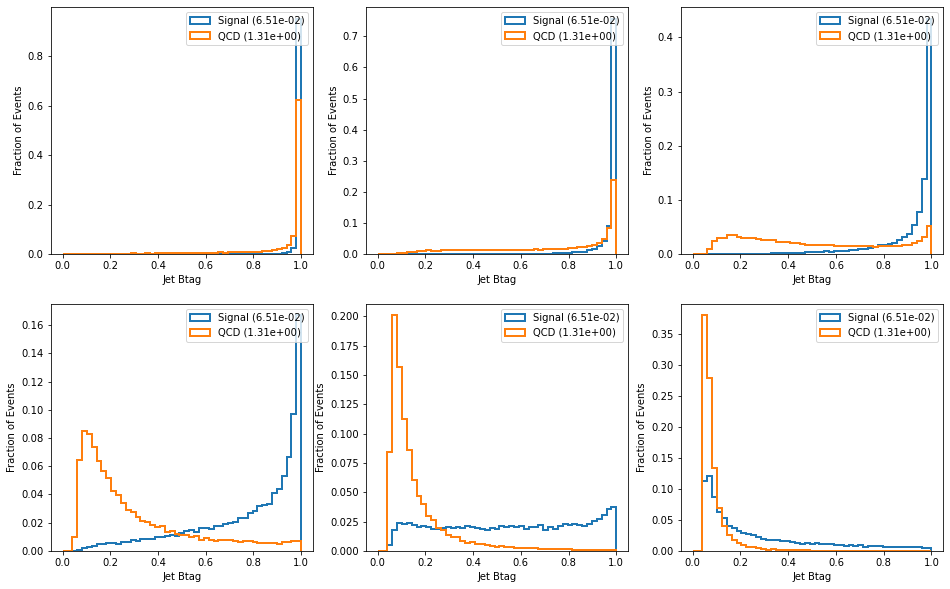

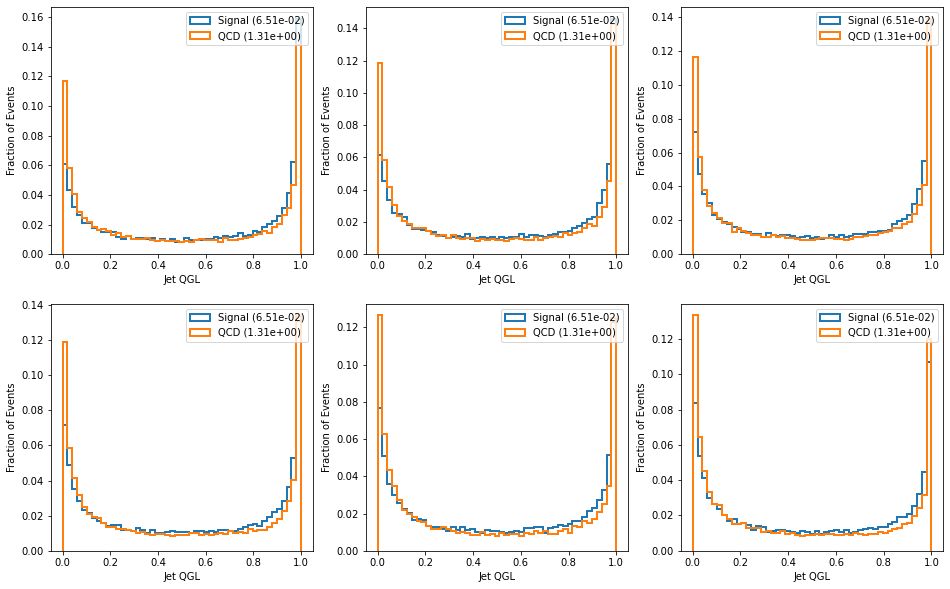

In [5]:
selection_list = [signal_selection,qcd_selections]
labels = ["Signal","QCD"]

for varname in ["jet_pt","jet_eta","jet_btag","jet_qgl"]:
    nrows,ncols = 2,3
    fig,axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(16,10))
    for ijet in range(6): 
        figax=(fig,axs[ijet//ncols,ijet%ncols])
        plot_ijet(selection_list,varname,ijet,labels=labels,figax=figax)